In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os

In [17]:
# chemin actuel
current_directory = os.getcwd()


#charger le dossier initial et final
data_folder = os.path.join(current_directory)
result_folder = os.path.join(current_directory, "resultat")

#charger nuage pts
dataset=r"C:\Users\naim.cheriguene\Documents\Clean_downsampled_somag.xyz"
dataset_path = os.path.join(data_folder, dataset)

#gestion de l'erreur
try:
    pcd = np.loadtxt(dataset_path, skiprows=1)
    #variables de séparations d'attributs
    xyz=pcd[:,:3]
    rgb=pcd[:,3:6]
except Exception as e:
    print(f"Error loading dataset: {e}")


Shape of loaded data: (3628, 7)
RGB data found.


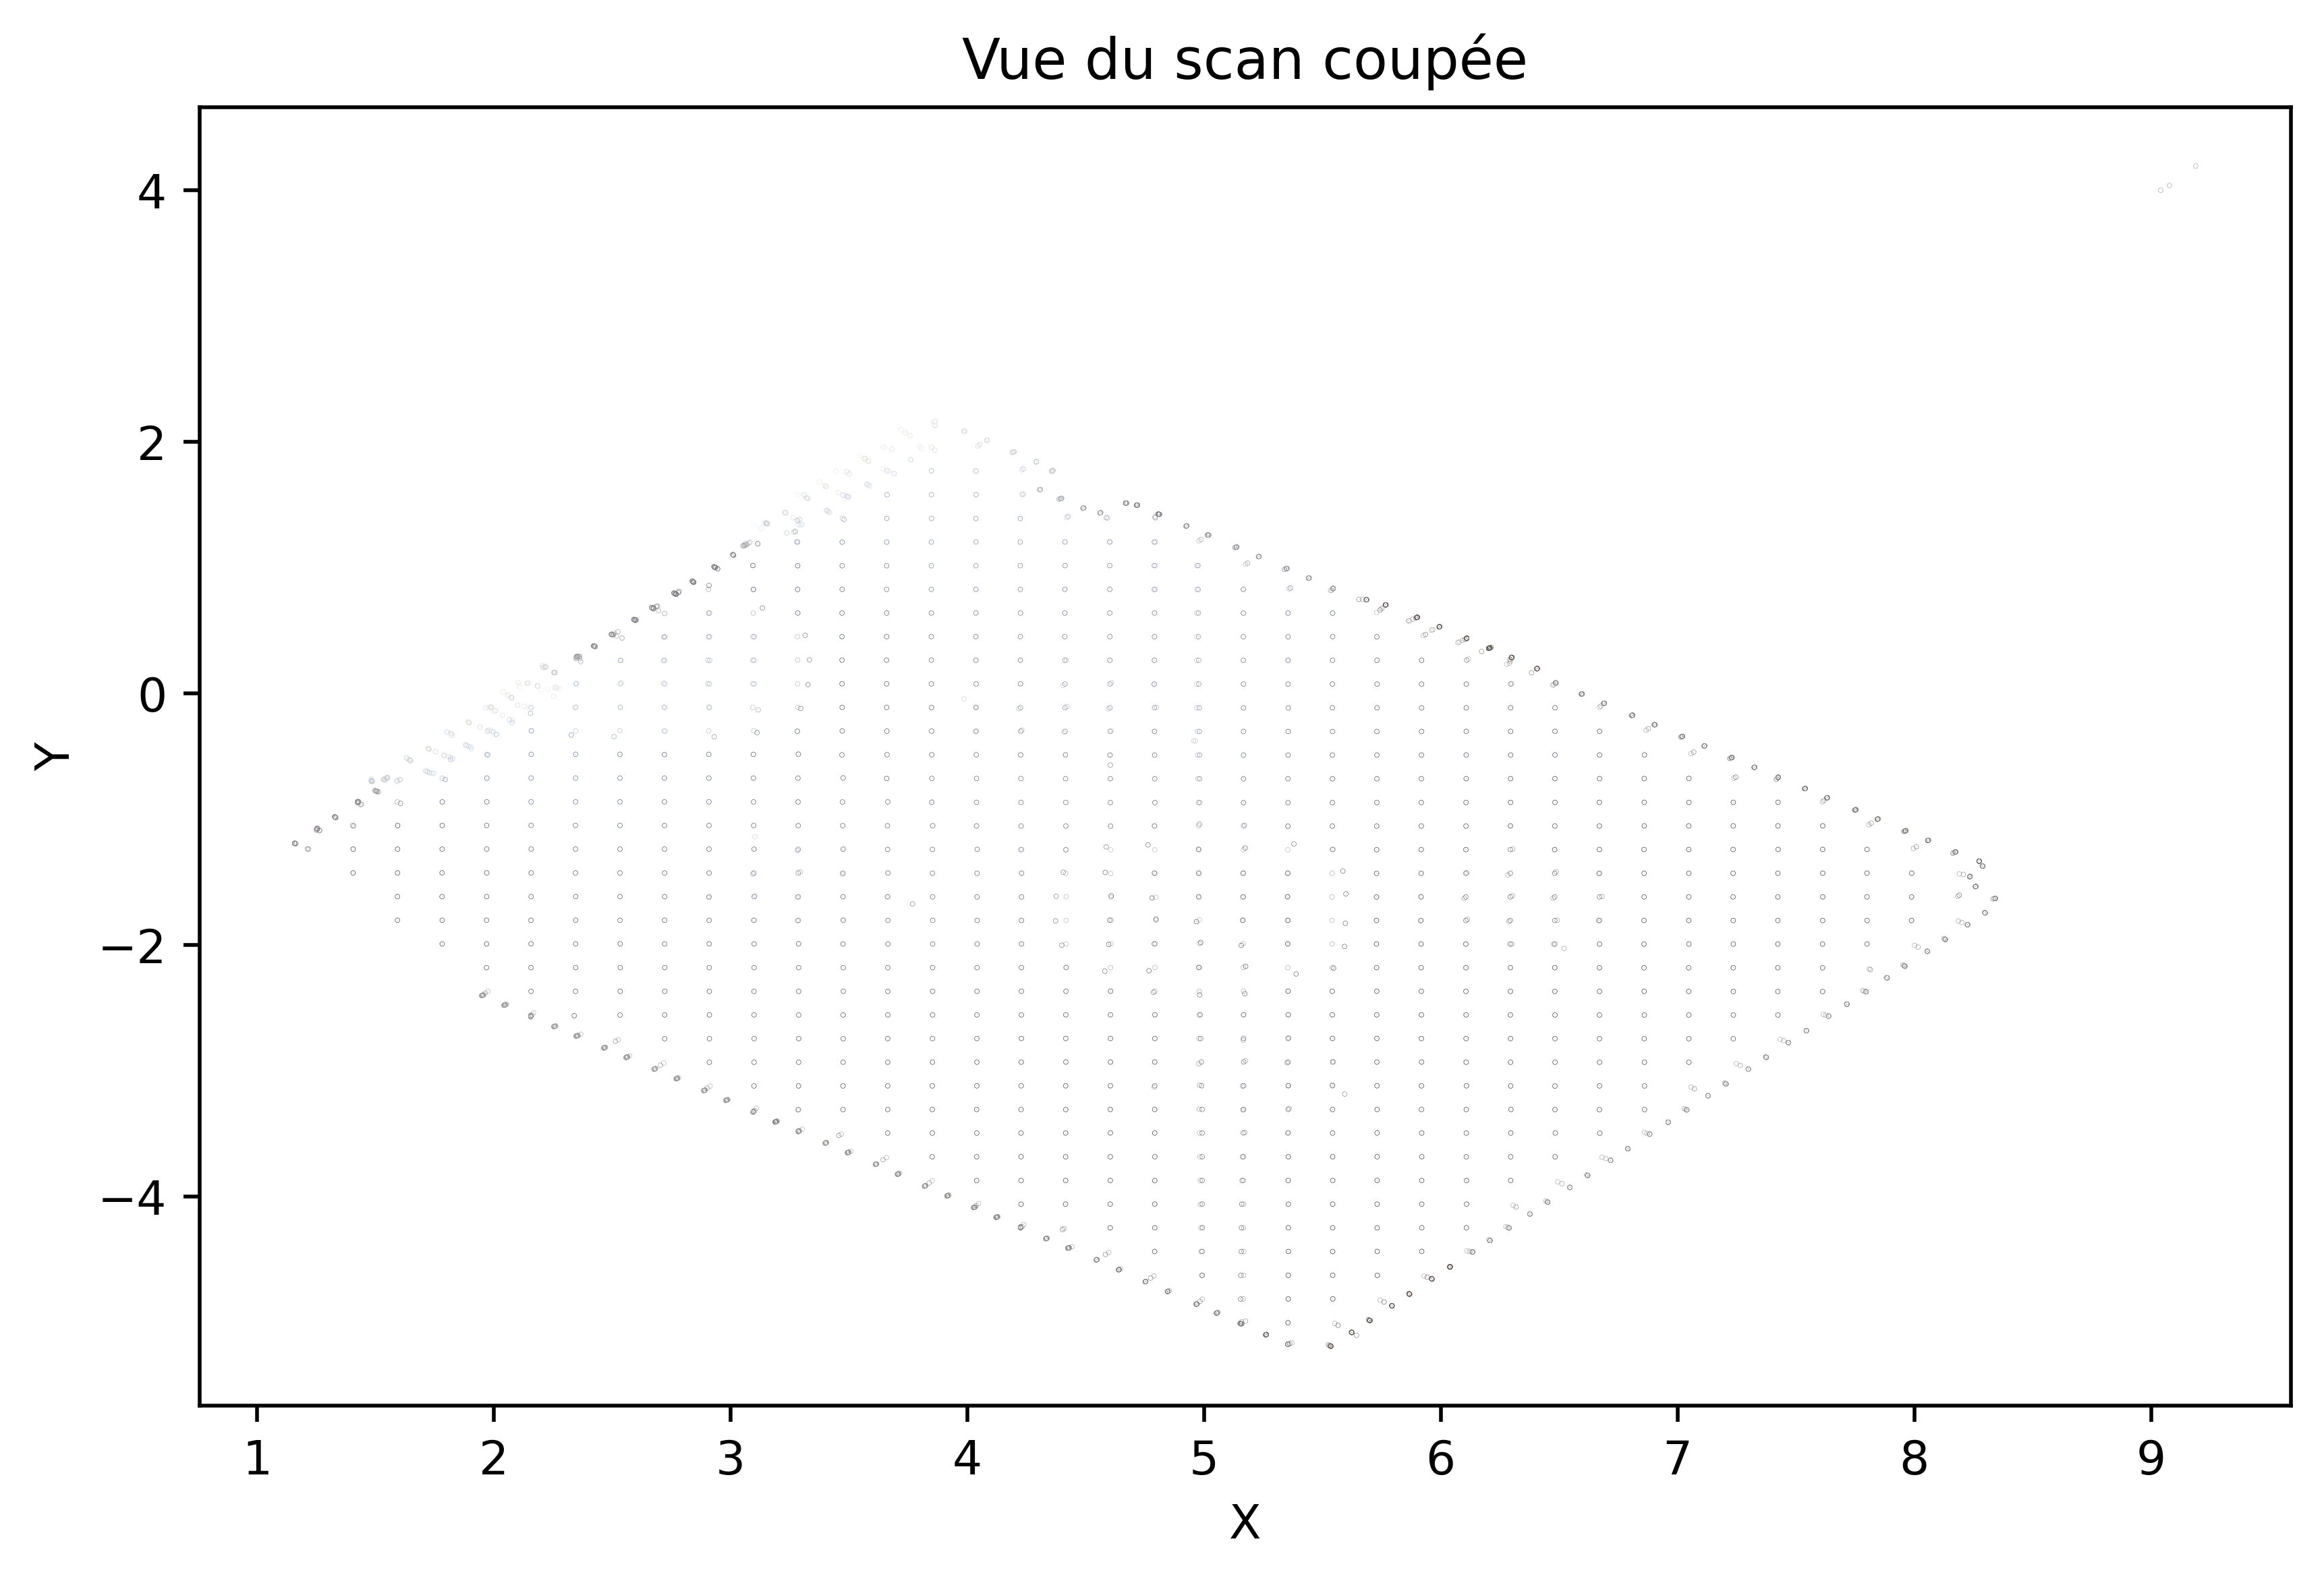

In [18]:
try:
    pcd = np.loadtxt(dataset_path, skiprows=1)
    print("Shape of loaded data:", pcd.shape)
    xyz = pcd[:, :3]
    # Check if RGB data exists
    if pcd.shape[1] >= 6:
        rgb = pcd[:, 3:6]
        print("RGB data found.")
    else:
        print("No RGB data found, using default color.")
        rgb = np.full((xyz.shape[0], 3), [1, 0, 0])  # Default to red if no RGB data
except Exception as e:
    print(f"Error loading dataset: {e}")

# Visualization
plt.figure(figsize=(8, 5), dpi=500)
if 'rgb' in locals():
    plt.scatter(xyz[:, 0], xyz[:, 1], c=rgb/255, s=0.005)
else:
    plt.scatter(xyz[:, 0], xyz[:, 1], c='r', s=0.05)  # Use a default color if rgb is not loaded
plt.title("Vue du scan coupée")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


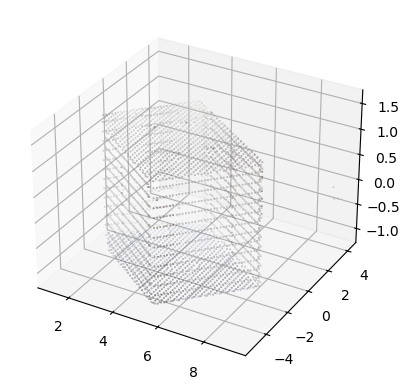

In [19]:
ax = plt.axes(projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = rgb/255, s=0.1)
plt.show()

In [20]:
idx_samples = random.sample(range(len(xyz)), 3)
pts = xyz[idx_samples]

vecA = pts[1] - pts[0]
vecB = pts[2] - pts[0]
normal = np.cross(vecA, vecB)

In [21]:
a,b,c = normal / np.linalg.norm(normal)
d=-np.sum(normal*pts[1])

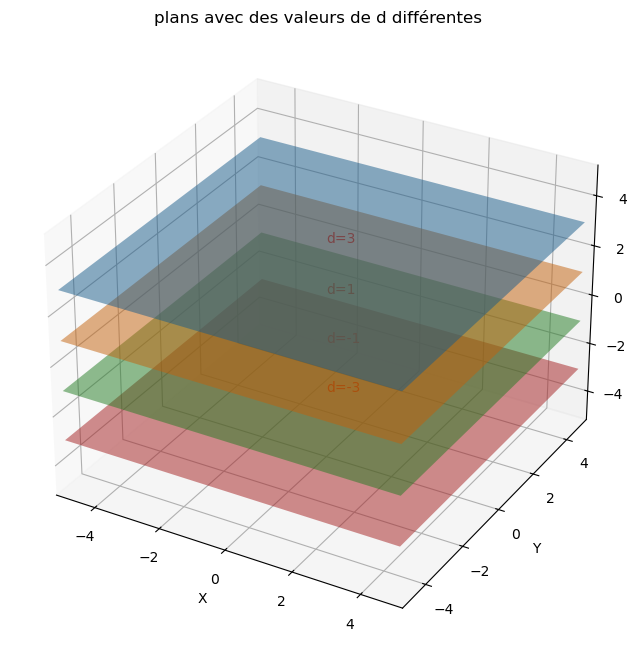

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the normal vector (pointing along z-axis)
normal_vector = np.array([0, 0, 1])

# Function to plot a plane given a, b, c, and d
def plot_plane(ax, a, b, c, d, plane_label):
    # Generate X, Y
    x = np.linspace(-5, 5, 10)
    y = np.linspace(-5, 5, 10)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Z from the plane equation ax + by + cz + d = 0
    Z = (-d - a * X - b * Y) / c
    
    # Plot the plane
    ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, label=plane_label)
    ax.text(0, 0, d+0.5, plane_label, color='red')

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

# Plot planes with different d values
d_values = [-3, -1, 1, 3]
for d in d_values:
    plot_plane(ax, *normal_vector, d, f"d={d}")

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Title and show
ax.set_title('plans avec des valeurs de d différentes')
plt.show()


In [23]:
distance = (a * xyz[:,0] + b * xyz[:,1] + c * xyz[:,2] + d
            ) / np.sqrt(a ** 2 + b ** 2 + c ** 2)

print(distance)

[3.1083684  3.54562041 4.1538652  ... 2.32742817 2.48972854 2.55604345]


In [24]:
iterations=1000
threshold=0.00000000000000000000000005

In [25]:
idx_candidates = np.where(np.abs(distance) <= threshold)[0]

In [14]:
# %%
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os

inliers=[]
idx_samples = random.sample(range(len(xyz)), 3)
pts = xyz[idx_samples]

vecA = pts[1] - pts[0]
vecB = pts[2] - pts[0]
normal = np.cross(vecA, vecB)
a,b,c = normal / np.linalg.norm(normal)
d=-np.sum(normal*pts[1])

In [28]:
def ransac_plane(xyz, threshold=0.05, iterations=1000):
  inliers=[]
  n_points=len(xyz)
  i=1

  while i<iterations:
    idx_samples = random.sample(range(n_points), 3)
    pts = xyz[idx_samples]

    vecA = pts[1] - pts[0]
    vecB = pts[2] - pts[0]
    normal = np.cross(vecA, vecB)
    a,b,c = normal / np.linalg.norm(normal)
    d=-np.sum(normal*pts[1])

    distance = (a * xyz[:,0] + b * xyz[:,1] + c * xyz[:,2] + d
                ) / np.sqrt(a ** 2 + b ** 2 + c ** 2) 

    idx_candidates = np.where(np.abs(distance) <= threshold)[0]

    if len(idx_candidates) > len(inliers):
      equation = [a,b,c,d]
      inliers = idx_candidates
    
    i+=1
  return equation, inliers

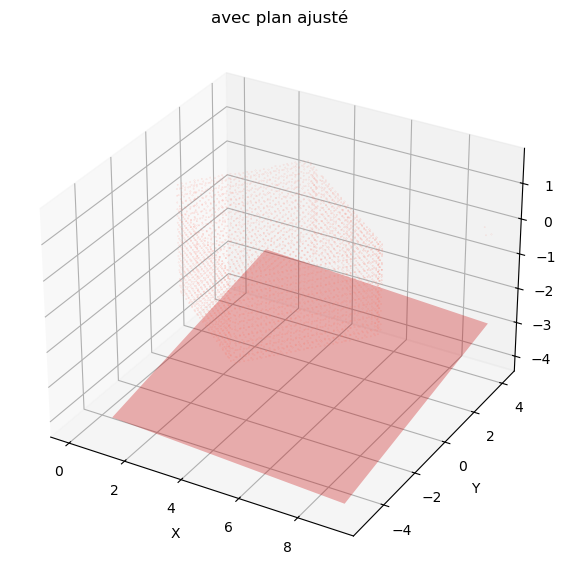

In [33]:
#seuil
distance_threshold = 0.1


distances = np.abs(a * xyz[:, 0] + b * xyz[:, 1] + c * xyz[:, 2] + d) / np.linalg.norm([a, b, c])

#inliners
inliers = distances < distance_threshold

#séparation entre points pertineents et non pert pour plan
xyz_in = xyz[inliers]
xyz_out = xyz[~inliers]

#visu
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')


ax.scatter(xyz_in[:, 0], xyz_in[:, 1], xyz_in[:, 2], c='cornflowerblue', s=0.02)


ax.scatter(xyz_out[:, 0], xyz_out[:, 1], xyz_out[:, 2], c='salmon', s=0.02)

x_range = np.linspace(xyz[:, 0].min(), xyz[:, 0].max(), 10)
y_range = np.linspace(xyz[:, 1].min(), xyz[:, 1].max(), 10)
x, y = np.meshgrid(x_range, y_range)
z = (-d - a * x - b * y) / c
ax.plot_surface(x, y, z, color='r', alpha=0.3, rstride=100, cstride=100, edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('avec plan ajusté')
plt.show()


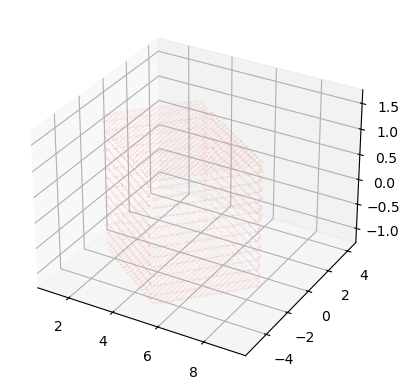

In [35]:
eq,idx_inliers=ransac_plane(xyz,0.01)
inliers=xyz[idx_inliers]

mask = np.ones(len(xyz), dtype=bool)
mask[idx_inliers] = False

outliers=xyz[mask]

ax = plt.axes(projection='3d')
ax.scatter(inliers[:,0], inliers[:,1], inliers[:,2], c = 'cornflowerblue', s=0.02)
ax.scatter(outliers[:,0], outliers[:,1], outliers[:,2], c = 'salmon', s=0.02)


plt.show()

In [36]:
def ransac_plane(xyz, threshold=0.05, iterations=1000):
  inliers=[]
  n_points=len(xyz)
  i=1

  while i<iterations:
    idx_samples = random.sample(range(n_points), 3)
    pts = xyz[idx_samples]

    vecA = pts[1] - pts[0]
    vecB = pts[2] - pts[0]
    normal = np.cross(vecA, vecB)
    a,b,c = normal / np.linalg.norm(normal)
    d=-np.sum(normal*pts[1])

    distance = (a * xyz[:,0] + b * xyz[:,1] + c * xyz[:,2] + d
                ) / np.sqrt(a ** 2 + b ** 2 + c ** 2) 

    idx_candidates = np.where(np.abs(distance) <= threshold)[0]

    if len(idx_candidates) > len(inliers):
      equation = [a,b,c,d]
      inliers = idx_candidates
    
    i+=1
  return equation, inliers



In [66]:
import os

# Define the directory where the plots will be saved
save_path = r"C:\Users\naim.cheriguene\Documents\OneDrive - Association Cesi Viacesi mail\040_FISA_BTP_A4\001_ADS\00_texdocument\images\analyse-resultats"

# Ensure the directory exists
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define the iterations levels and their corresponding colors
iterations_levels = [100, 1000, 10000, 100000]
colors = ['red', 'green', 'blue', 'purple']

# Number of times to run each iteration level for stability check
num_trials = 3

for iterations, color in zip(iterations_levels, colors):
    for trial in range(1, num_trials + 1):
        # Call the ransac_plane function with your xyz data
        plane_equation, inliers = ransac_plane(xyz, threshold, iterations)

        # Create a new figure for plotting.
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        # Plot the entire point cloud with a small point size and light grey color.
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=1, color='lightgrey')

        # Plot the inliers with a larger point size and the specific color for this level.
        inlier_points = xyz[inliers]
        ax.scatter(inlier_points[:, 0], inlier_points[:, 1], inlier_points[:, 2], s=3, color=color)

        # Annotate the plot with the number of inliers, the iterations level, and the trial number.
        ax.text2D(0.05, 0.95, f'Trial: {trial}\nIterations: {iterations}\nNumber of inliers: {len(inliers)}', transform=ax.transAxes, color=color)

        # Construct the filename based on the iterations level and trial number
        filename = f"ransac_{iterations}_inliers_trial_{trial}.png"
        filepath = os.path.join(save_path, filename)
        
        # Save the plot to the specified directory
        plt.savefig(filepath)

        # Clear the current figure to prepare for the next plot
        plt.clf()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>